## Estadística Aplicada
Sesión 8-7 sep

Francisco Javier Chávez Hernández 2034204 gpo 44

In [1]:
## librerías básicas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install openpyxl

In [8]:
#librería especializada
from lifelines import KaplanMeierFitter 
from lifelines.statistics import logrank_test

In [7]:
#datos
ejer_km=pd.read_excel('ejercicio_km.xlsx')

In [ ]:
!pip install lifelines

In [9]:
ejer_km.head()

,indiv,tiempo_sup,evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [13]:
#modelo kaplan-meier
km1=KaplanMeierFitter().fit(ejer_km['tiempo_sup'], ejer_km['evento'])

In [14]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [15]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


Text(0.5, 0, 'tiempo')

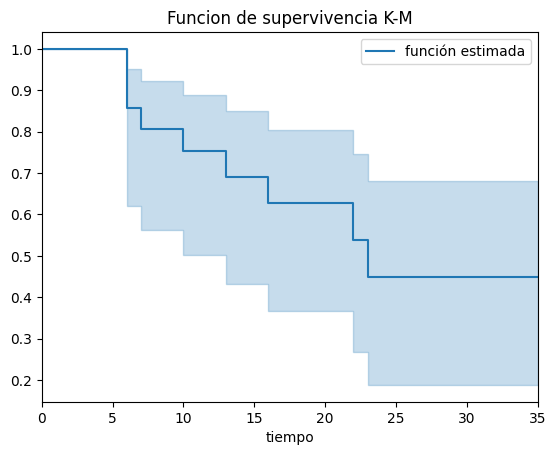

In [24]:
# grafica 
km1.plot_survival_function(label='función estimada')
plt.title('Funcion de supervivencia K-M')
plt.xlim(0,35)
plt.xlabel('tiempo')

Revisar una nueva base de datos


In [25]:
relacion=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [26]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [27]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

La base contiene la informacion de 42 individuos que se encuentran en una relación, "t" es el tiempo de supervivencia de la relación en semanas, evento "relación terminada" está en la columna estado 1 relación terminó, 0 censurada. La variable tratamiento contiene 0 y 1, 0 es si la persona no era detallista en la relación y 1 es si la persona era detallista. Detallista es que hiciera un regalo a la semana a su pareja (flor, paleta, oso, etc)

In [28]:
km_all=KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

(0.0, 35.0)

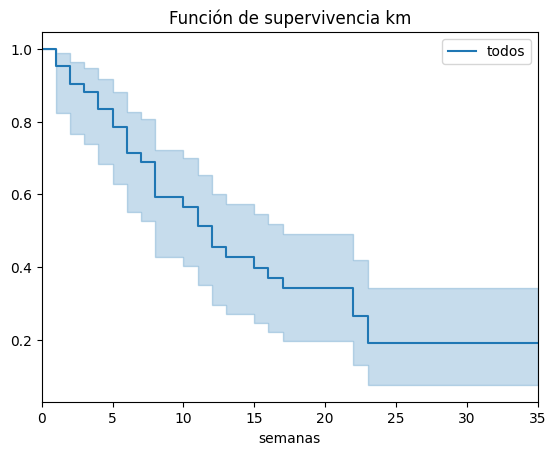

In [29]:
km_all.plot_survival_function(label='todos')
plt.title('Función de supervivencia km')
plt.xlabel('semanas')
plt.xlim(0,35)

In [33]:
#detallistas
detallistas=relacion.query('tratamiento==1')
no_deta=relacion.query('tratamiento==0')


In [35]:
## funciones de supervivencia para detallistas y no detallistas
km_deta=KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_nodeta=KaplanMeierFitter().fit(no_deta['t'], no_deta['estado'])

(0.0, 35.0)

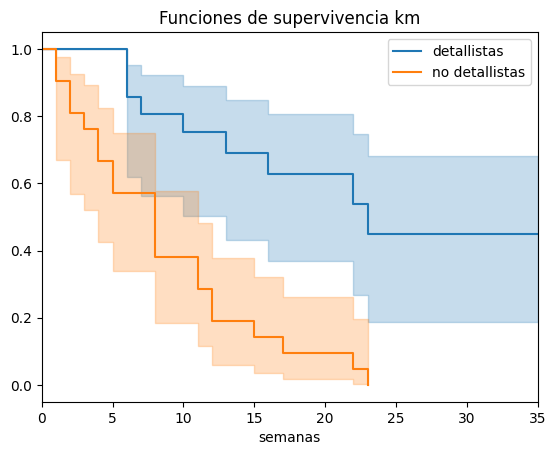

In [38]:
km_deta.plot_survival_function(label='detallistas')
km_nodeta.plot_survival_function(label='no detallistas')
plt.title('Funciones de supervivencia km')
plt.xlabel('semanas')
plt.xlim(0,35)

Para verificar que las funciones de supervivencia son distintas realizaremos una prueba de hipotesis (log_rank_test)

log rank test

$H_0: S(1)=S(2) $ funciones de superv identicas

$H_a: S(1)\neq S(2) $ funciones de suprev distinas

In [44]:
#gpo1 detallistas, gpo2 no detallistas
LRT=logrank_test(detallistas['t'], no_deta['t'],detallistas['estado'], no_deta['estado'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [49]:
print(LRT.p_value.round(7))

4.17e-05


In [58]:
print('Como', LRT.p_value.round(7),'<',0.05,'Rechazamos H0', 'significa que las funciones de supervivencia son distintas, por lo tanto \nlos no detallistas terminana su relacion mas rapido que los detallistas') 

Como 4.17e-05 < 0.05 Rechazamos H0 significa que las funciones de supervivencia son distintas, por lo tanto 
los no detallistas terminana su relacion mas rapido que los detallistas
